# Assignment 2 - Wind profiles, shear, and stability

## Import

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import math

## Data

In [3]:
Hoe = pd.read_csv("Hoevsoere2008.csv")

In [4]:
Hoe

,name,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m
0,200801010000,0.152,-0.0074,41.6726,2.97165,2.59215,4.68932,5.37364,5.95689,6.46508
1,200801010010,0.123,-0.0087,51.6034,2.97663,3.98903,5.54254,5.98760,6.53404,6.97209
2,200801010020,0.134,-0.0104,52.6452,2.76732,4.15521,6.20265,6.80962,7.22990,7.52415
3,200801010030,0.135,-0.0086,48.7002,2.66463,3.67854,5.77822,6.49033,7.04092,7.39945
4,200801010040,0.052,-0.0014,45.6730,2.45688,2.94888,5.07810,5.83270,6.36725,6.76746
...,...,...,...,...,...,...,...,...,...,...
44862,200812312310,0.403,-0.0456,335.3680,6.16087,7.96938,10.76900,11.77440,12.37210,12.60200
44863,200812312320,0.422,-0.0453,337.1350,6.15687,7.98717,10.55960,11.69550,12.66640,13.09670
44864,200812312330,0.388,-0.0408,334.9430,6.22002,8.27035,11.16080,12.22490,12.95410,13.23880
44865,200812312340,0.341,-0.0381,333.4440,6.22807,7.86902,10.57440,11.56800,12.06370,12.29320


In [5]:
Hoe.rename(columns={'name': 'timestamp'}, inplace=True)

## Task 1

In [6]:
# Karman constant
k = 0.4
# Gravity
g = 9.81

Change surface layer temp (T_10) to kelvin

In [7]:
Hoe["T_10m_K"] = Hoe["T_10m"] + 273.15

In [8]:
Hoe["1/L"] = ((k*g)/Hoe["T_10m_K"])*((-Hoe["wsc"])/((Hoe["u_star_2d"])**3))

In [9]:
Hoe

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
0,200801010000,0.152,-0.0074,41.6726,2.97165,2.59215,4.68932,5.37364,5.95689,6.46508,276.12165,0.029945
1,200801010010,0.123,-0.0087,51.6034,2.97663,3.98903,5.54254,5.98760,6.53404,6.97209,276.12663,0.066439
2,200801010020,0.134,-0.0104,52.6452,2.76732,4.15521,6.20265,6.80962,7.22990,7.52415,275.91732,0.061471
3,200801010030,0.135,-0.0086,48.7002,2.66463,3.67854,5.77822,6.49033,7.04092,7.39945,275.81463,0.049729
4,200801010040,0.052,-0.0014,45.6730,2.45688,2.94888,5.07810,5.83270,6.36725,6.76746,275.60688,0.141761
...,...,...,...,...,...,...,...,...,...,...,...,...
44862,200812312310,0.403,-0.0456,335.3680,6.16087,7.96938,10.76900,11.77440,12.37210,12.60200,279.31087,0.009788
44863,200812312320,0.422,-0.0453,337.1350,6.15687,7.98717,10.55960,11.69550,12.66640,13.09670,279.30687,0.008469
44864,200812312330,0.388,-0.0408,334.9430,6.22002,8.27035,11.16080,12.22490,12.95410,13.23880,279.37002,0.009811
44865,200812312340,0.341,-0.0381,333.4440,6.22807,7.86902,10.57440,11.56800,12.06370,12.29320,279.37807,0.013496


Read page 93

Probaility density function

## Task 2

In [10]:
#Easter wind filter
filter_2 = (Hoe["dir_metmast_60m"] >= 70) & (Hoe["dir_metmast_60m"] <= 110)

#Neutral conditions filter
filter_1 = Hoe["1/L"].abs() < 0.0005

filtered_Hoe = Hoe[filter_1 & filter_2]

In [11]:
filtered_Hoe

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
204,200801021200,0.409,-0.0009,75.3320,3.938150,5.73629,6.72659,7.21169,7.64671,8.03121,277.088150,0.000186
205,200801021210,0.353,0.0006,77.1807,4.013850,6.02018,7.29854,7.78025,8.21616,8.56211,277.163850,-0.000193
206,200801021220,0.464,-0.0006,81.0822,4.051890,6.47754,7.64026,7.96439,8.27534,8.61539,277.201890,0.000085
207,200801021230,0.368,-0.0001,83.6215,4.056790,6.38485,7.64065,8.23059,8.47128,8.78089,277.206790,0.000028
216,200801021400,0.438,-0.0013,81.2734,3.916900,6.57345,7.85059,8.41318,8.86007,9.20216,277.066900,0.000219
...,...,...,...,...,...,...,...,...,...,...,...,...
44592,200812291020,0.293,-0.0004,100.9610,1.765120,3.98454,4.76040,5.23101,5.67885,6.11032,274.915120,0.000227
44594,200812291040,0.214,0.0003,103.7000,1.801660,4.23295,5.04428,5.47406,5.84877,6.20969,274.951660,-0.000437
44595,200812291050,0.337,0.0013,102.1210,1.818030,4.67706,5.55342,5.74217,6.16051,6.39331,274.968030,-0.000485
44614,200812291400,0.247,0.0005,109.6660,2.366640,4.19164,4.61895,4.76177,5.00851,5.20927,275.516640,-0.000473


### a)

Means

In [12]:
wsp_10m = Hoe["wsp_metmast_10m"].mean()
wsp_40m = Hoe["wsp_metmast_40m"].mean()
wsp_60m = Hoe["wsp_metmast_60m"].mean()
wsp_80m = Hoe["wsp_metmast_80m"].mean()
wsp_100m = Hoe["wsp_metmast_100m"].mean()

In [13]:
u_star = Hoe["u_star_2d"].mean()
print(u_star)

0.4015743642320638


Standard deviatons

In [14]:
std_10m = Hoe["wsp_metmast_10m"].std()
std_40m = Hoe["wsp_metmast_40m"].std()
std_60m = Hoe["wsp_metmast_60m"].std()
std_80m = Hoe["wsp_metmast_80m"].std()
std_100m = Hoe["wsp_metmast_100m"].std()

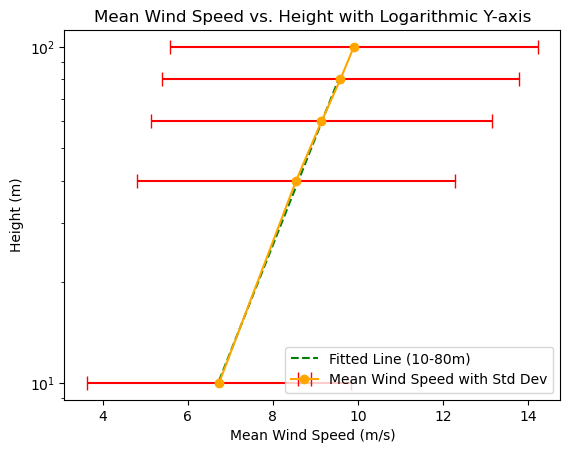

<Figure size 640x480 with 0 Axes>

In [15]:
# Heights corresponding to the wind speed measurements
heights = [10, 40, 60, 80, 100]
heights_for_fit = [10, 40, 60, 80]
#wind_speed_columns = ['wsp_metmast_10m', 'wsp_metmast_40m', 'wsp_metmast_60m', 'wsp_metmast_80m', 'wsp_metmast_100m']


# Calculate the mean wind speed for each height
wind_speeds = [wsp_10m, wsp_40m, wsp_60m, wsp_80m, wsp_100m]
wind_speeds_fit = [wsp_10m, wsp_40m, wsp_60m, wsp_80m]
#mean_wind_speeds = [df_neutral[col].mean() for col in wind_speed_columns]

# # We apply np.log to the heights since we are working in semi-log space (logarithmic y-axis)
# log_heights = np.log(heights_for_fit)
# slope, intercept, r_value, p_value, std_err = linregress(log_heights, wind_speeds_fit)

# # Generate the fitted line
# fitted_line = intercept + slope * np.log(heights_for_fit)


log_heights = np.log10(heights[0:4])

slope, intercept = np.polyfit(wind_speeds[0:4],log_heights,1)

fitted_line = 10**(np.array(wind_speeds[0:4])*slope + intercept)

# Standard deviations corresponding to the heights
std_devs = [std_10m, std_40m, std_60m, std_80m, std_100m]

# Create the plot with error bars for the standard deviation
plt.errorbar(wind_speeds, heights, xerr=std_devs, fmt='o', ecolor='red', linestyle='-', color='orange', capsize=5, label='Mean Wind Speed with Std Dev')

# Plot the fitted line on top (extending the line between 10 m and 80 m)
plt.plot(wind_speeds[0:4], fitted_line, 'g--', label='Fitted Line (10-80m)')

# Set x-axis and y-axis labels
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Mean Wind Speed vs. Height with Logarithmic Y-axis')

# Apply a logarithmic scale to the y-axis (height)
plt.yscale('log')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Optionally, save the figure as a PDF
plt.savefig('log_mean_wind_speed_vs_height.pdf')

Find u_star and z0 parameters

In [16]:
z0 = 10**intercept
u_star = k/slope

print(z0)
print(u_star)




0.07163555050779997
1.252702029491351


In [20]:
u_star_60=wsp_60m*k/np.log(60/z0)
u_star_80=wsp_80m*k/np.log(80/z0)

u_60_to_100= u_star_60/k*np.log(100/z0)
u_80_to_100= u_star_80/k*np.log(100/z0)
  
error_60=100-(u_60_to_100*100/wsp_100m)
error_80=100-(u_80_to_100*100/wsp_100m)

print(f"the difference from 60 to 100 is {error_60} %")
print(f"the difference from 80 to 100 is {error_80} %")

the difference from 60 to 100 is 0.6539425612912311 %
the difference from 80 to 100 is 0.10555774089790759 %


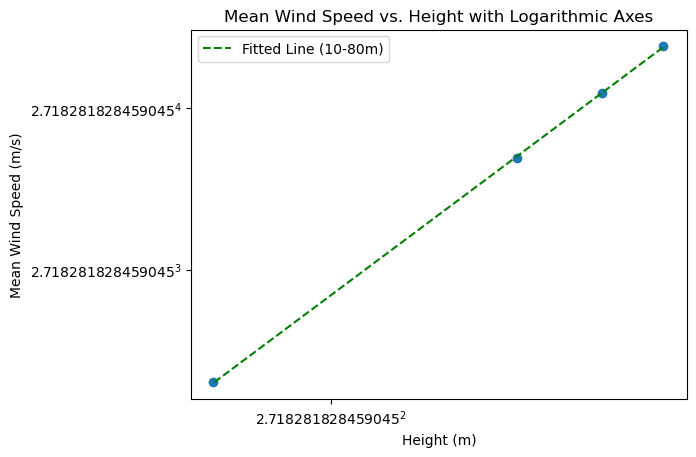

th long-term mean shear exponent is 0.16995667092393266
0.10363360145314642
0.1646244423958825
th long-term mean shear exponent calculated by means 0.1646244423958825
the difference from 60 to 100 is 0.5584103897515575 %
the difference from 60 to 100 is 0.4388318772850113 %
the difference from 60 to 100 is 1.2203332294195235 %
the difference from 60 to 100 is 1.0999675948393275 %
the difference from 60 to 100 is 0.6646697410124887 %
the difference from 60 to 100 is 0.5449648707892152 %


<Figure size 640x480 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Heights corresponding to the wind speed measurements
heights = [10, 40, 60, 80, 100]
heights_for_fit = [10, 40, 60, 80]

# Wind speeds corresponding to the heights (replace with your data)
wind_speeds = [wsp_10m, wsp_40m, wsp_60m, wsp_80m, wsp_100m]
wind_speeds_fit = [wsp_10m, wsp_40m, wsp_60m, wsp_80m]

# Standard deviations corresponding to the wind speeds (replace with your data)
std_devs = [std_10m, std_40m, std_60m, std_80m, std_100m]

# Logarithmic transformation of wind speeds and heights
log_heights = np.log(heights_for_fit)
log_wind_speeds_fit = np.log(wind_speeds_fit)

# Perform linear regression in log-log space
slope, intercept = np.polyfit(log_heights, log_wind_speeds_fit, 1)

# Generate the fitted line
fitted_log_wind_speeds = slope * np.log(heights_for_fit) + intercept

# Convert fitted values back to linear scale for plotting
fitted_wind_speeds = np.exp(fitted_log_wind_speeds)

# Create the plot with error bars
#plt.errorbar(heights, wind_speeds, yerr=std_devs, fmt='o', ecolor='red', linestyle='-', color='orange', capsize=5, label='Mean Wind Speed with Std Dev')

# Plot the fitted line
plt.plot( fitted_wind_speeds, heights_for_fit, 'g--', label='Fitted Line (10-80m)')
plt.scatter(wind_speeds_fit,heights_for_fit)
# Set x-axis and y-axis labels
plt.xlabel('Height (m)')
plt.ylabel('Mean Wind Speed (m/s)')
plt.title('Mean Wind Speed vs. Height with Logarithmic Axes')

# Apply a logarithmic scale to both axes
plt.yscale('log', base=math.e)
plt.xscale('log', base=math.e)

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Optionally, save the figure as a PDF
plt.savefig('log_mean_wind_speed_vs_height.pdf')



#############################################  Q2.e ###############################
a_slope=slope
print(f'th long-term mean shear exponent is {a_slope}')



z_ref= (10*40*60*80)**(1/len(heights_for_fit))
z0=z_ref*np.exp(-1/a_slope)

print(z0)
#############################################  Q2.f ###############################

a_means = np.log(wsp_80m/wsp_60m)/np.log(80/60)
print(a_means)
print(f'th long-term mean shear exponent calculated by means {a_means}')
#############################################  Q2.g ###############################

U_100_slope= wsp_80m*(100/80)**a_slope


U_100_means= wsp_80m*(100/80)**a_means


error_slope_exper = np.abs(100 - U_100_slope/wsp_100m*100)

error_means_exper = np.abs(100 - U_100_means/wsp_100m*100)

error_slope_60 = np.abs(100 - U_100_slope/u_60_to_100*100)

error_means_60 = np.abs(100 - U_100_means/u_60_to_100*100)

error_slope_80 = np.abs(100 - U_100_slope/u_80_to_100*100)

error_means_80 = np.abs(100 - U_100_means/u_80_to_100*100)


print(f"the difference from 60 to 100 is {error_slope_exper} %")
print(f"the difference from 60 to 100 is {error_means_exper} %")
print(f"the difference from 60 to 100 is {error_slope_60} %")
print(f"the difference from 60 to 100 is {error_means_60} %")
print(f"the difference from 60 to 100 is {error_slope_80} %")
print(f"the difference from 60 to 100 is {error_means_80} %")

